In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

In [58]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall('data')

In [108]:
df_train = pd.read_csv(r'data/train.csv') #將資料變成dataframe
df_test  = pd.read_csv(r'data/test.csv')
df_train #印出資料查看資料內容
df_train['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [60]:
#先看看基本資料們
print(df_train.shape) #查看trian的形狀，以方便後來訂定神經網路的輸入層
print(df_test.shape)  #查看test形狀
print('*'*50)
print(df_train.dtypes) #看一下訓練資料的各個欄位的型態

(1460, 81)
(1459, 80)
**************************************************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [61]:
df_train.drop("Id",inplace = True,axis=1) #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_test.drop("Id",inplace = True,axis=1)  #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_train.head(5) #.head()可以查看前幾筆資料，括號填入數字


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 相關係數範例

In [62]:
x = np.random.randint(0, 100, 10)
y = 5 * x 
z = np.random.randint(0,100,10)
dataframe = pd.DataFrame({'x':x,'y':y,'z':z})
dataframe

,x,y,z
0,96,480,25
1,4,20,83
2,72,360,82
3,70,350,13
4,57,285,22
5,70,350,90
6,42,210,44
7,42,210,47
8,50,250,87
9,54,270,68


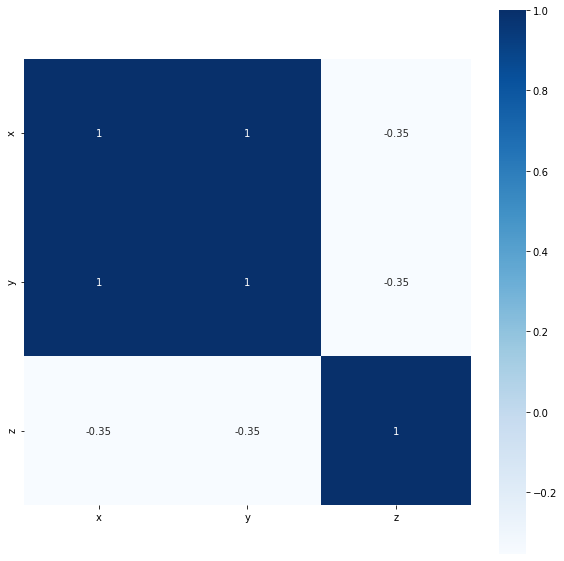

In [63]:
df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

<AxesSubplot:>

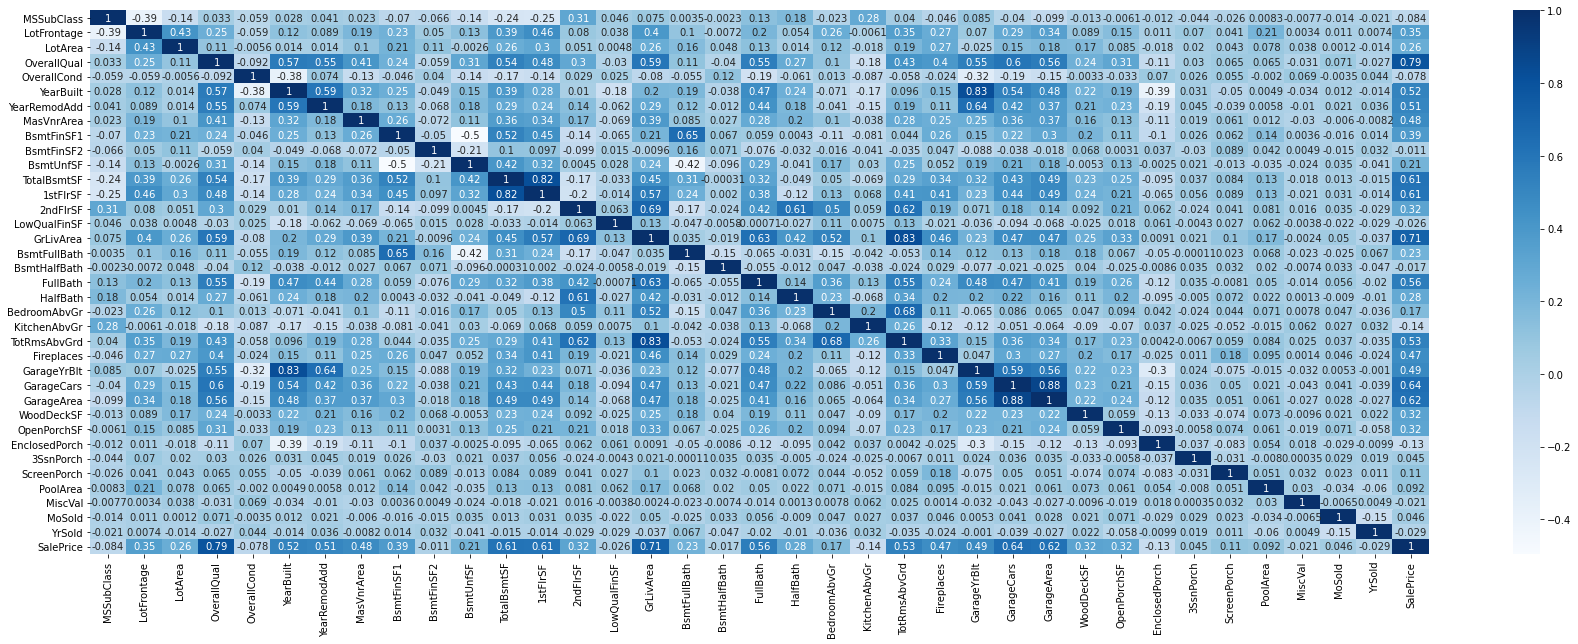

In [64]:
trian_corr =df_train.corr() #計算相關係數
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [65]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


## 補充相關係數

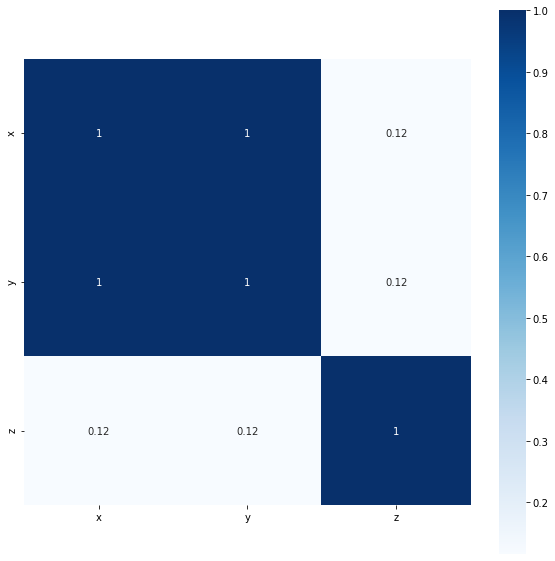

In [66]:
x = np.random.randint(0, 100, 10) #0~100隨機找10筆數據
y = 5 * x 
z = np.random.randint(0,100,10)
l = ['a','b','c','d','e','f','g','h','i','j'] #新增的

dataframe = pd.DataFrame({'x':x,'y':y,'z':z,'l':l})

df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

### One-Hot-Encoding

In [67]:
name = ['John','Jason','Jenny']
df_data = pd.DataFrame(name)
print(df_data)
#以上是基本的建立資料
one_hot_data = pd.get_dummies(df_data) 
#Pandas裡面有get_dummies函數，可以直接進行One-Hot Encoding
pd.DataFrame(one_hot_data)

       0
0   John
1  Jason
2  Jenny


,0_Jason,0_Jenny,0_John
0,0,0,1
1,1,0,0
2,0,1,0


### Label Encoding

In [68]:
name = ['John','Jason','Jenny']
df_data = pd.DataFrame(name)
print(df_data)
#以上是基本的建立資料
from sklearn.preprocessing import LabelEncoder #導入LabelEncoder工具
df_data[0] = LabelEncoder().fit_transform(df_data[0])
#LabelEncoder()只能鎖定一行，所以要特別標註是哪行
df_data

       0
0   John
1  Jason
2  Jenny


,0
0,2
1,0
2,1


In [69]:
float_data = trian_corr.index #是float或int的的傢伙
print(float_data)
all_col = df_train.columns #全部的col
object_data = []
for i in range(len(all_col)): #查找全部的all_col，len(all_col)是長度(要全部找過一遍)
    if all_col[i] not in float_data: #如果在float_data裡面沒有，表示它是object幫的
        object_data.append(all_col[i]) #不是就加上去
print(len(object_data))
print(object_data) #object 種類

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Kit

In [70]:
df_train.isnull()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [71]:
from sklearn.preprocessing import LabelEncoder
#df_train[pd.isnull(df_train)]  = 'NaN'
for i in object_data: #將轉換是object的傢伙轉換，從object_data陣列一個一個抓出來改造
        df_train[i] = LabelEncoder().fit_transform(df_train[i].factorize()[0]) 
        #df_train[i] = df_train[i]
        #pd.factorize()[0]會給nans(缺失值)一個-1的值，若沒寫這個，會造成等號兩邊不等的情況
df_train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,0,1,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,0,2,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,0,1,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


### 測試pd.factorize

In [72]:
aaa = pd.factorize(pd.Series(['a',np.nan]))
aaa

(array([ 0, -1]), Index(['a'], dtype='object'))

### 計算相關係數

(80, 80)


<AxesSubplot:>

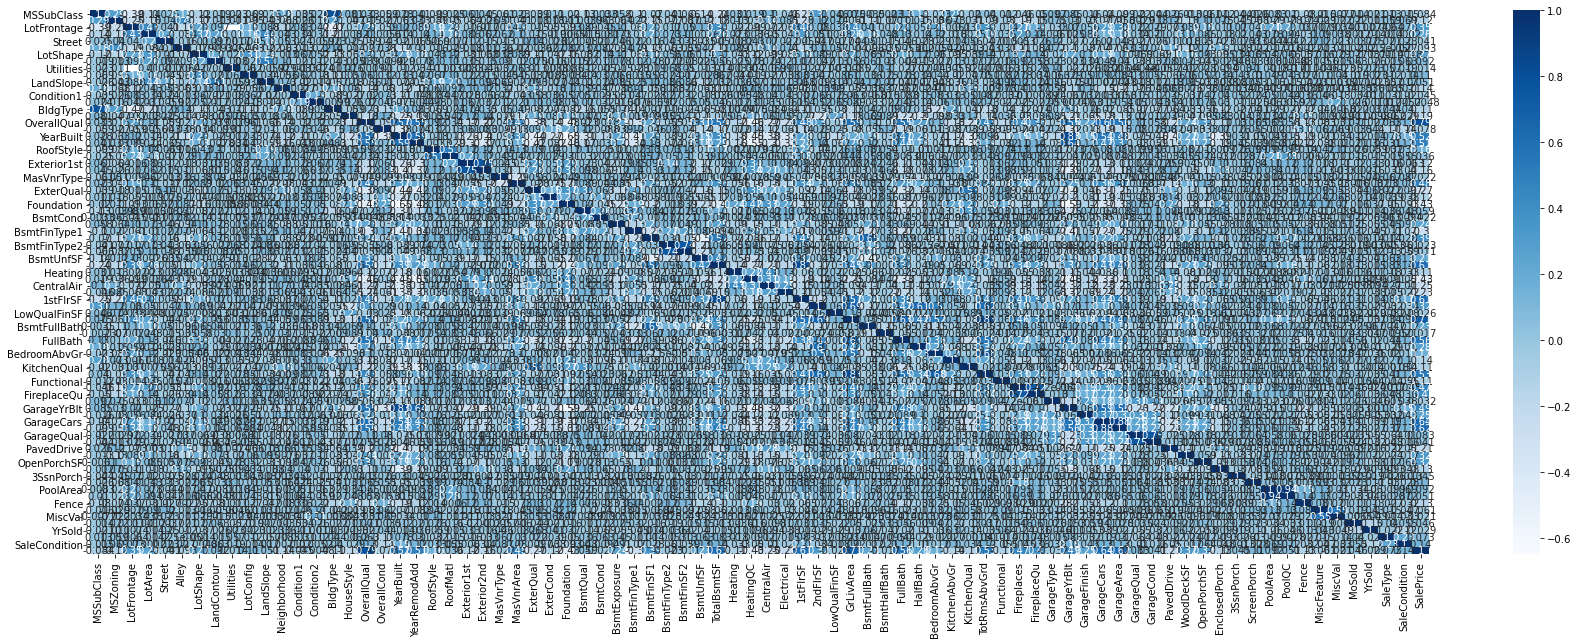

In [75]:
trian_corr =df_train.corr() #計算相關係數
print(trian_corr.shape) #查看形狀
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [76]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr)

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


### 移除相關系統小於 0.6

In [77]:
for i in df_train.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        df_train = df_train.drop(i,axis=1) #就把它拔掉
df_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


In [78]:
train_targets = df_train["SalePrice"].values #把SalePrice這行數值整個拉出來
train_data = df_train.drop(columns=["SalePrice"]) #刪除SalePrice這行
print(train_targets)
print("*"*50)
train_data

[208500 181500 223500 ... 266500 142125 147500]
**************************************************


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
...,...,...,...,...,...,...
1455,6,953,953,1647,2,460
1456,6,1542,2073,2073,2,500
1457,7,1152,1188,2340,1,252
1458,5,1078,1078,1078,1,240


### 切分出驗證集

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_trian,Y_validation = train_test_split(train_data, train_targets, test_size=0.2, random_state=0)
#X_train,X_test, y_train, y_test = model_selection.train_test_split(train_data,train_target,test_size=0.2, random_state=0)
#train_test_split的括號裡面，1.資料的x那些種類2.y的部分3.X_test的部分要佔全部資料的多少(我們這裡是驗證集唷)4.指定一個隨機種子，0的話就是隨機囉
#就是一種隨機切分資料的功能
#隨機種子相同的話，在另一個框框在跑一次一樣的code還是會出現相同的隨機數
print(X_train.shape)
print(Y_trian.shape)
print('*'*50)
print(X_validation.shape)
print(Y_validation.shape)
X_train_dataset = X_train.values #取出數值，轉換回list
X_validation_dataset = X_validation.values
print(X_train_dataset)

(1168, 6)
(1168,)
**************************************************
(292, 6)
(292,)
[[   9 1822 1828 1828    3  774]
 [   5  894  894  894    1  308]
 [   5  876  964  964    2  432]
 ...
 [   6    0 1318 1902    2  539]
 [   7 1374 1557 1557    2  420]
 [   7 1195 1195 1839    2  486]]


In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1168 non-null   int64
 1   TotalBsmtSF  1168 non-null   int64
 2   1stFlrSF     1168 non-null   int64
 3   GrLivArea    1168 non-null   int64
 4   GarageCars   1168 non-null   int64
 5   GarageArea   1168 non-null   int64
dtypes: int64(6)
memory usage: 63.9 KB


In [107]:
X_train.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,6.086473,1053.511986,1160.958904,1518.882705,1.771404,473.632705
std,1.367472,412.073393,373.315037,513.800708,0.730041,209.442320
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000
25%,5.000000,798.750000,884.000000,1139.000000,1.000000,336.000000
50%,6.000000,992.000000,1092.000000,1471.500000,2.000000,477.500000
75%,7.000000,1276.250000,1389.250000,1788.500000,2.000000,576.000000
max,10.000000,3206.000000,3228.000000,4676.000000,4.000000,1390.000000


### 資料正規化

In [80]:
from sklearn import preprocessing #引入所需函式庫
normalize = preprocessing.StandardScaler() #取一個短的名字
# 標準化處理
X_trian_normal_data = normalize.fit_transform(X_train_dataset) #將訓練資料標準化
X_validation_normal_data = normalize.fit_transform(X_validation_dataset) #將驗證資料標準化

print(X_trian_normal_data)
print('*'*50)
print(X_validation_normal_data)

[[ 2.13150648  1.86572881  1.78757018  0.60188649  1.68363344  1.43474327]
 [-0.79485211 -0.38726187 -0.71540986 -1.21671763 -1.05711061 -0.79116606]
 [-0.79485211 -0.43096212 -0.52782035 -1.08041967  0.31326141 -0.19886401]
 ...
 [-0.06326246 -2.55770764  0.4208466   0.7459729   0.31326141  0.31223535]
 [ 0.66832719  0.77807813  1.06133079  0.0742187   0.31326141 -0.25618356]
 [ 0.66832719  0.34350342  0.09122504  0.62330474  0.31326141  0.05907398]]
**************************************************
[[-0.10448035  1.80908987  3.08966184  1.77891255  0.30770478  0.05915902]
 [-0.10448035 -0.50234569 -0.48512908  0.13380716 -0.92311434 -0.99987664]
 [-0.79784997 -0.68477796 -0.43691417 -0.52458613 -0.92311434 -0.51376191]
 ...
 [-0.10448035 -0.67537423  1.13581016  1.79822542 -0.92311434 -1.10404408]
 [-1.49121958 -1.22831325 -1.05911606 -1.39366529 -2.15393345 -2.04155105]
 [-0.79784997 -1.0214313  -1.35070145 -0.68611196 -0.92311434 -0.79154175]]


In [52]:
X_trian_normal_data.shape[1]

6

### Keras建立神經網路

In [81]:
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers import BatchNormalization,Dropout,Dense
from keras.callbacks import ModelCheckpoint
#上方為引進所需model

#建立model
def model():
    model = Sequential()
    model.add(layers.Dense(1024,kernel_initializer = 'random_normal',
             activation = 'relu',
             input_shape = (X_trian_normal_data.shape[1],)))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(1024, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(512, kernel_initializer = 'random_normal', 
                        activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(256, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(128, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(32, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(16, kernel_initializer = 'random_normal', 
                           activation = 'relu'))
    model.add(Dropout(0.3))
    
    model.add(layers.Dense(1, kernel_initializer = 'random_normal',
                          activation = 'linear'))
    
    adam = optimizers.Adam(lr=0.001)
    #lr學習率
    model.compile(optimizer = adam, loss = 'mae')
    #設定要的優化器以及loss函數
    return model     

In [82]:
call = ModelCheckpoint('good.h5',
                     monitor = 'val_loss',
                     verbose = 0,
                     save_best_only = True,
                     save_weights_only = True,
                     mode = 'auto',
                     period = 1)

#ModelCheckpoint：!.保存的名稱2.要監視的值3.訊息展示的樣子
#4.5.設置為True的時候，當監視的數值變低會立即保存，也就是保存最好的(所以也有人會讓epochs很大很大去抓最好的，但神經網路或是資料沒有多做什麼調整其實不會差到太多)
#6.auto模式下在比對你的監視值他會自己判斷是不是變好還是變差，要不要儲存7CheckPoint間的epcoh數

model = model()    
history = model.fit(X_trian_normal_data, Y_trian,
                    validation_data = [X_validation_normal_data, Y_validation],
                    callbacks = [call],
                    epochs = 600, 
                    batch_size = 512, verbose = 1)
#model.fit的1.2.之前就有介紹過拉；3.validation_data就是加入驗證集去讓超參數跑得更好；
#4.callbacks看是否要使用，然後設定是怎樣子；
#5.epochs完整的資料要疊代幾次
#6.每次的批次大小是多少
#7.verbose:0是不輸出進度條；1是輸出進度條


Train on 1168 samples, validate on 292 samples
Epoch 1/600
1168/1168 [==============================] - 2s 2ms/step - loss: 180808.9024 - val_loss: 181370.3750
Epoch 2/600
1168/1168 [==============================] - 0s 166us/step - loss: 180808.8771 - val_loss: 181370.3125
Epoch 3/600
1168/1168 [==============================] - 0s 163us/step - loss: 180808.7494 - val_loss: 181369.7812
Epoch 4/600
1168/1168 [==============================] - 0s 160us/step - loss: 180807.9266 - val_loss: 181367.7188
Epoch 5/600
1168/1168 [==============================] - 0s 160us/step - loss: 180804.7842 - val_loss: 181360.0938
Epoch 6/600
1168/1168 [==============================] - 0s 161us/step - loss: 180793.3459 - val_loss: 181334.7344
Epoch 7/600
1168/1168 [==============================] - 0s 160us/step - loss: 180757.8131 - val_loss: 181257.9375
Epoch 8/600
1168/1168 [==============================] - 0s 160us/step - loss: 180653.7292 - val_loss: 181043.9531
Epoch 9/600
1168/1168 [============

1168/1168 [==============================] - 0s 157us/step - loss: 44125.9242 - val_loss: 27150.8555
Epoch 73/600
1168/1168 [==============================] - 0s 160us/step - loss: 44625.8418 - val_loss: 25471.6113
Epoch 74/600
1168/1168 [==============================] - 0s 164us/step - loss: 42490.8631 - val_loss: 27941.8633
Epoch 75/600
1168/1168 [==============================] - 0s 158us/step - loss: 40728.9538 - val_loss: 28975.2461
Epoch 76/600
1168/1168 [==============================] - 0s 162us/step - loss: 45717.9117 - val_loss: 27451.5566
Epoch 77/600
1168/1168 [==============================] - 0s 158us/step - loss: 43674.8853 - val_loss: 29513.0488
Epoch 78/600
1168/1168 [==============================] - 0s 159us/step - loss: 41725.5563 - val_loss: 31637.2461
Epoch 79/600
1168/1168 [==============================] - 0s 161us/step - loss: 43984.8351 - val_loss: 28360.2090
Epoch 80/600
1168/1168 [==============================] - 0s 163us/step - loss: 44157.5327 - val_loss

1168/1168 [==============================] - 0s 166us/step - loss: 41998.9862 - val_loss: 24357.8262
Epoch 144/600
1168/1168 [==============================] - 0s 162us/step - loss: 44396.4446 - val_loss: 26133.5820
Epoch 145/600
1168/1168 [==============================] - 0s 158us/step - loss: 41198.4864 - val_loss: 31355.6855
Epoch 146/600
1168/1168 [==============================] - 0s 163us/step - loss: 43119.2534 - val_loss: 27403.8984
Epoch 147/600
1168/1168 [==============================] - 0s 161us/step - loss: 42833.2291 - val_loss: 24272.4434
Epoch 148/600
1168/1168 [==============================] - 0s 158us/step - loss: 42852.4380 - val_loss: 26110.6035
Epoch 149/600
1168/1168 [==============================] - 0s 157us/step - loss: 41823.9362 - val_loss: 27856.9395
Epoch 150/600
1168/1168 [==============================] - 0s 155us/step - loss: 42731.0697 - val_loss: 26819.8906
Epoch 151/600
1168/1168 [==============================] - 0s 158us/step - loss: 42895.3281 - 

1168/1168 [==============================] - 0s 162us/step - loss: 40960.0222 - val_loss: 23800.1055
Epoch 215/600
1168/1168 [==============================] - 0s 165us/step - loss: 42370.8908 - val_loss: 27022.3945
Epoch 216/600
1168/1168 [==============================] - 0s 165us/step - loss: 42552.4836 - val_loss: 27879.4766
Epoch 217/600
1168/1168 [==============================] - 0s 160us/step - loss: 42898.3021 - val_loss: 24972.2988
Epoch 218/600
1168/1168 [==============================] - 0s 169us/step - loss: 41550.7541 - val_loss: 25262.8789
Epoch 219/600
1168/1168 [==============================] - 0s 165us/step - loss: 41529.7337 - val_loss: 29057.0039
Epoch 220/600
1168/1168 [==============================] - 0s 170us/step - loss: 42605.4487 - val_loss: 27580.7891
Epoch 221/600
1168/1168 [==============================] - 0s 167us/step - loss: 44050.9114 - val_loss: 24299.5391
Epoch 222/600
1168/1168 [==============================] - 0s 163us/step - loss: 43333.5894 - 

1168/1168 [==============================] - 0s 164us/step - loss: 40360.1009 - val_loss: 25158.7715
Epoch 286/600
1168/1168 [==============================] - 0s 158us/step - loss: 41470.1238 - val_loss: 25126.0781
Epoch 287/600
1168/1168 [==============================] - 0s 161us/step - loss: 42822.3442 - val_loss: 27355.4062
Epoch 288/600
1168/1168 [==============================] - 0s 163us/step - loss: 42038.3833 - val_loss: 26064.9668
Epoch 289/600
1168/1168 [==============================] - 0s 160us/step - loss: 42759.3309 - val_loss: 26294.9277
Epoch 290/600
1168/1168 [==============================] - 0s 156us/step - loss: 39938.8640 - val_loss: 26185.0625
Epoch 291/600
1168/1168 [==============================] - 0s 161us/step - loss: 42235.1654 - val_loss: 23461.9629
Epoch 292/600
1168/1168 [==============================] - 0s 162us/step - loss: 41869.8176 - val_loss: 25701.0273
Epoch 293/600
1168/1168 [==============================] - 0s 161us/step - loss: 40071.0507 - 

1168/1168 [==============================] - 0s 160us/step - loss: 42251.8153 - val_loss: 24309.6172
Epoch 357/600
1168/1168 [==============================] - 0s 157us/step - loss: 43196.4595 - val_loss: 22977.9492
Epoch 358/600
1168/1168 [==============================] - 0s 158us/step - loss: 41229.4394 - val_loss: 28736.6504
Epoch 359/600
1168/1168 [==============================] - 0s 163us/step - loss: 40423.4709 - val_loss: 25197.8047
Epoch 360/600
1168/1168 [==============================] - 0s 164us/step - loss: 40285.4216 - val_loss: 23017.1055
Epoch 361/600
1168/1168 [==============================] - 0s 164us/step - loss: 40666.2292 - val_loss: 28862.4492
Epoch 362/600
1168/1168 [==============================] - 0s 160us/step - loss: 41881.1783 - val_loss: 30322.5918
Epoch 363/600
1168/1168 [==============================] - 0s 164us/step - loss: 41221.2808 - val_loss: 26236.6113
Epoch 364/600
1168/1168 [==============================] - 0s 161us/step - loss: 40655.5068 - 

1168/1168 [==============================] - 0s 157us/step - loss: 42854.8785 - val_loss: 24127.2578
Epoch 428/600
1168/1168 [==============================] - 0s 155us/step - loss: 40321.3603 - val_loss: 30891.2012
Epoch 429/600
1168/1168 [==============================] - 0s 163us/step - loss: 41855.4266 - val_loss: 25108.8320
Epoch 430/600
1168/1168 [==============================] - 0s 165us/step - loss: 40783.5603 - val_loss: 22630.9180
Epoch 431/600
1168/1168 [==============================] - 0s 167us/step - loss: 42007.0866 - val_loss: 26543.4082
Epoch 432/600
1168/1168 [==============================] - 0s 160us/step - loss: 39597.4288 - val_loss: 28408.0684
Epoch 433/600
1168/1168 [==============================] - 0s 165us/step - loss: 40268.2953 - val_loss: 22852.1543
Epoch 434/600
1168/1168 [==============================] - 0s 163us/step - loss: 43527.5304 - val_loss: 22848.2207
Epoch 435/600
1168/1168 [==============================] - 0s 163us/step - loss: 42262.6920 - 

1168/1168 [==============================] - 0s 166us/step - loss: 42205.5877 - val_loss: 26162.8965
Epoch 499/600
1168/1168 [==============================] - 0s 160us/step - loss: 41259.3725 - val_loss: 23137.7578
Epoch 500/600
1168/1168 [==============================] - 0s 160us/step - loss: 41150.5469 - val_loss: 24414.9824
Epoch 501/600
1168/1168 [==============================] - 0s 164us/step - loss: 41834.1703 - val_loss: 25526.3086
Epoch 502/600
1168/1168 [==============================] - 0s 163us/step - loss: 40581.4698 - val_loss: 24142.2480
Epoch 503/600
1168/1168 [==============================] - 0s 160us/step - loss: 41383.3226 - val_loss: 23684.2188
Epoch 504/600
1168/1168 [==============================] - 0s 174us/step - loss: 39633.5557 - val_loss: 25042.2383
Epoch 505/600
1168/1168 [==============================] - 0s 163us/step - loss: 40868.4254 - val_loss: 25941.2852
Epoch 506/600
1168/1168 [==============================] - 0s 165us/step - loss: 39863.5932 - 

1168/1168 [==============================] - 0s 162us/step - loss: 43336.7429 - val_loss: 22719.9414
Epoch 570/600
1168/1168 [==============================] - 0s 162us/step - loss: 41464.7127 - val_loss: 29426.4590
Epoch 571/600
1168/1168 [==============================] - 0s 161us/step - loss: 41986.7291 - val_loss: 25468.7012
Epoch 572/600
1168/1168 [==============================] - 0s 163us/step - loss: 41721.1782 - val_loss: 22444.5625
Epoch 573/600
1168/1168 [==============================] - 0s 163us/step - loss: 43016.3270 - val_loss: 27776.7090
Epoch 574/600
1168/1168 [==============================] - 0s 160us/step - loss: 42315.1849 - val_loss: 28847.8770
Epoch 575/600
1168/1168 [==============================] - 0s 157us/step - loss: 40295.0726 - val_loss: 22418.4238
Epoch 576/600
1168/1168 [==============================] - 0s 162us/step - loss: 41290.3581 - val_loss: 24327.6934
Epoch 577/600
1168/1168 [==============================] - 0s 161us/step - loss: 40640.7228 - 

### Model 參數
### 第1層 : Param = （输入数据维度+1）* 神经元个数 = 7*1024 = 7168
### 第2層 : Param =  (1024+1)*1024 = 1049600
### 第3層 : Param =  (1024+1)*512 = 524800
### 第4層 : Param =  (512+1)*256 = 131328
### 第5層 : Param =  (128+1)*32 = 4128
### 第6層 : Param =  (32+1)*16 = 528
### 第7層 : Param =  (16+1)*1 = 17

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1024)              7168      
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)              

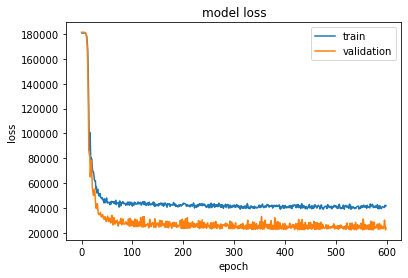

In [84]:
#history 會記錄訓練的狀況，會將model.fit回傳的東西記錄下來，以下是常用的示範
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

### 測試

In [110]:
for i in df_test.columns: #查找原本資料中所有columns
    if i not in high_corr: 
        #如果沒有在訓練時相關係數大於0.6的話就拔掉，因為真正影響房價的不是小於0.6的
        df_test = df_test.drop(i,axis=1) 
        #i是跑過test裡面的columns所有人，axis=1是指定要丟掉"行"
print(df_test) #看一下刪掉相關係數小的人樣子
X_test_dataset = df_test.values #只要數值就好不要dataframe形式
from sklearn import preprocessing
normalize = preprocessing.StandardScaler() 
# 標準化處理
X_test_normal_data = normalize.fit_transform(X_test_dataset)

print(X_test_normal_data) #看一下標準化的結果

      OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  GarageCars  GarageArea
0               5        882.0       896        896         1.0       730.0
1               6       1329.0      1329       1329         1.0       312.0
2               5        928.0       928       1629         2.0       482.0
3               6        926.0       926       1604         2.0       470.0
4               8       1280.0      1280       1280         2.0       506.0
...           ...          ...       ...        ...         ...         ...
1454            4        546.0       546       1092         0.0         0.0
1455            4        546.0       546       1092         1.0       286.0
1456            5       1224.0      1224       1224         2.0       576.0
1457            5        912.0       970        970         0.0         0.0
1458            7        996.0       996       2000         3.0       650.0

[1459 rows x 6 columns]
[[-0.75110125 -0.3706814  -0.65456132 -1.21558782 -0.98767408  

In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   TotalBsmtSF  1458 non-null   float64
 2   1stFlrSF     1459 non-null   int64  
 3   GrLivArea    1459 non-null   int64  
 4   GarageCars   1458 non-null   float64
 5   GarageArea   1458 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 68.5 KB


### 載入儲存的model估測看看測試集房價

In [86]:
model.load_weights('good.h5') #召喚之前儲存的model
pred = model.predict(X_test_normal_data) #括號內填入要預測的資料
print(pred)

[[132718.8  ]
 [154419.34 ]
 [151200.23 ]
 ...
 [148652.34 ]
 [105818.445]
 [245185.94 ]]


In [95]:
X_test_normal_data[1116]

array([-0.75110125, -0.42262983, -0.53899195,  0.70447943,         nan,
               nan])

In [94]:
model.load_weights('good.h5') #召喚之前儲存的model
pred = model.predict(X_test_normal_data[1116:1118]) #括號內填入要預測的資料
print(pred)

[[      nan]
 [108783.06]]


### 將預測資料打包成csv檔

In [87]:
with open('house_predict.csv', 'w') as f: #開啟一個檔案，house_predict.csv是名字；w是寫入
    f.write('Id,SalePrice\n') #寫入最上方的列，並用\n往下一列
    for i in range(len(pred)): #len(pred)看整個test有多長，然後用for去跑全部
        f.write(str(i + 1461) + ',' + str(float(pred[i])) + '\n')
        #寫入，這邊特別注意「+1461」，因為它給的sample_submission是從1461開始
        #中間加上逗號是因為前面有介紹過csv檔是以逗號為間隔的檔案
        #str(float(pred[i]):先把它變成浮點數，再用str()把它變回字串
        #後面的'\n'是要換下一列的意思
        #注意到中間全部是用「+號」隔開，這是字串的基本招式唷